## Import Relevant Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
sns.set()

## Load The Data

In [10]:
data = pd.read_csv(r"C:\Users\bssam\Downloads\archive (1)\Cancer_Data.csv")

## Cancer Types:
1. Benign cancer (B)

2. Malignant cancer (M)

## Remap Dependant Variable

In [11]:
data.diagnosis = data.diagnosis.map({'M':1 , 'B':0})

## Drop unwanted Columns

In [14]:
data = data.drop(['Unnamed: 32' , 'id'] , axis=1)

## Check Nulls

In [17]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Intizalize Dependate and Independant Variables

In [23]:
y = data.diagnosis
x = data.drop(['diagnosis'] , axis= 1)

## Split the Data

In [24]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state= 365 , stratify= y)

## Intialize the Relevant variables for testing

In [25]:
train_accuracies = {}
test_accuracies = {}
neigbors = np.arange(1,26)

## Running a test to check the best n_neighnot value

In [26]:
for neigbor in neigbors:
    knn = KNeighborsClassifier(n_neighbors=neigbor)
    knn.fit(x_train , y_train)
    train_accuracies[neigbor] = knn.score(x_train,y_train)
    test_accuracies[neigbor] = knn.score(x_test,y_test)
    

## Plot The Graph

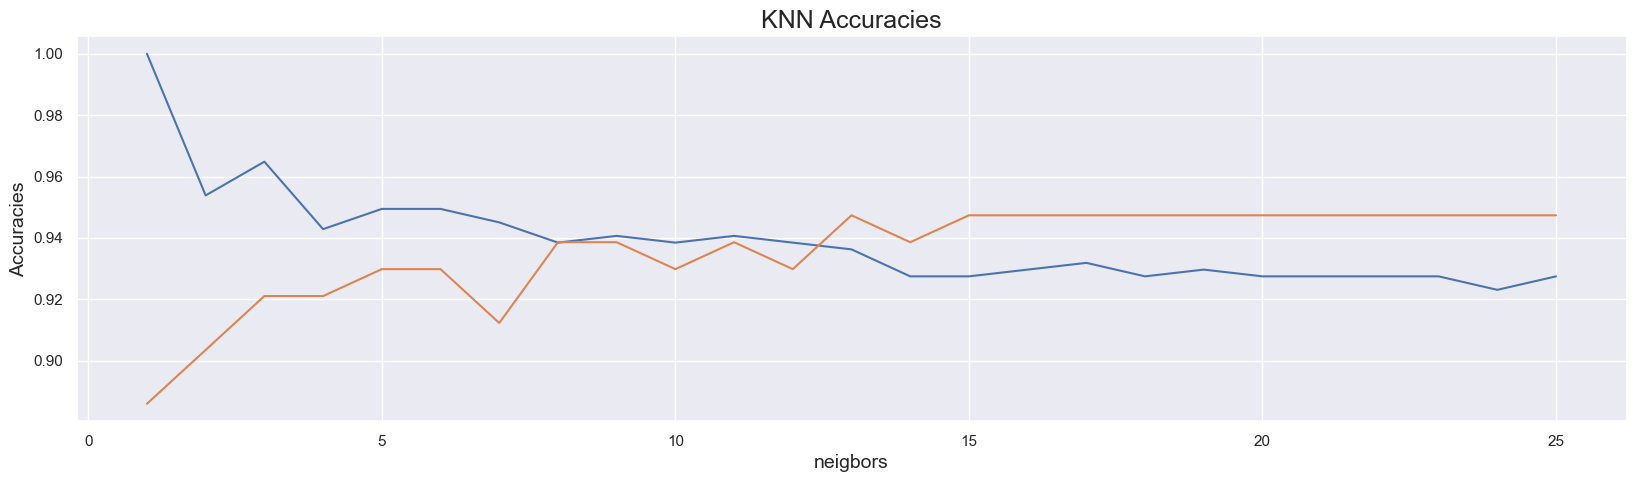

In [33]:
plt.figure(figsize=(20,5))
plt.title('KNN Accuracies' , size = 18)
plt.plot(neigbors , train_accuracies.values() , label = 'train_accuracies')
plt.plot(neigbors , test_accuracies.values() , label = 'test_accuracies')
plt.ylabel('Accuracies' , size = 14)
plt.xlabel('neigbors', size = 14)
plt.show()

## Fit the Model with the most Proper n_neighbor value
## Check the accuracy

In [32]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train , y_train)
print(f'Best Accuracy is: {knn.score(x_test,y_test)}')

Best Accuracy is: 0.9473684210526315
